## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importing data          

In [2]:
user_ratings =pd.read_csv("D:\\Data Analysis\\Data\\user_rating.csv")
user_ratings.head()

,userID,placeID,food_rating,service_rating
0,U1077,135085,2,2
1,U1077,135038,2,1
2,U1077,132825,2,2
3,U1077,135060,2,2
4,U1068,135104,1,2


In [3]:
consumer_survey = pd.read_excel("D:\\Data Analysis\\Data\\consumer_survey.xlsx")
consumer_survey.head()

,gender,smoker,drink_level,dress_preference,ambience,transport,marital_status,interest,personality,religion,activity,income,FRVPM,AERPM
0,male,False,abstemious,informal,family,on foot,single,variety,thrifty-protector,none,student,medium,12,2976
1,female,False,abstemious,informal,family,public,single,technology,hunter-ostentatious,Catholic,student,low,12,3648
2,female,False,social drinker,formal,family,public,single,none,hard-worker,Catholic,student,low,3,1461
3,male,False,abstemious,informal,family,public,single,variety,hard-worker,none,professional,medium,18,4014
4,female,False,abstemious,no preference,family,public,single,none,thrifty-protector,Catholic,student,medium,15,3045


In [4]:
restaurant_parking = pd.read_excel("D:\\Data Analysis\\Data\\restaurant_parking.xlsx")
restaurant_parking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [5]:
dining_preferences=pd.read_excel("D:\\Data Analysis\\Data\\dining_preferences.xlsx")
dining_preferences.head()

,Year,Dine_In,Home_Delivery
0,1990,5649,0
1,1991,5539,0
2,1992,5760,104
3,1993,6509,76
4,1994,6982,156


In [6]:
restaurant_details = pd.read_csv("D:\\Data Analysis\\Data\\restaurant_details2.csv")
restaurant_details.head()

,placeID,name,address,state,country,zip,alcohol,smoking_area,price,area,other_services,Region,Average_dine_in_per_month
0,134999,KikuCuernavaca,Revolucion,Morelos,Mexico,NaN,No_Alcohol_Served,NaN,medium,closed,NaN,West,677.0
1,132825,puestodetacos,esquinasantosdegolladoyleonguzman,s.l.p.,mexico,78280,No_Alcohol_Served,NaN,low,open,NaN,West,NaN
2,135106,ElRincondeSanFrancisco,Universidad169,SanLuisPotosi,Mexico,78000,Wine-Beer,onlyatbar,medium,open,NaN,East,NaN
3,132667,littlepizzaEmilioPortesGil,calleemilioportesgil,tamaulipas,NaN,NaN,No_Alcohol_Served,NaN,low,closed,NaN,East,546.0
4,132613,carnitas_mata,lic.Emilioportesgil,Tamaulipas,Mexico,NaN,No_Alcohol_Served,permitted,medium,closed,NaN,East,697.0


## importing data from database

In [7]:
import pyodbc
conn_str = (r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=D:\Data Analysis\Data\restaurant_cuisine.accdb;')
conn= pyodbc.connect(conn_str)
cuisine =pd.read_sql('select *from cuisine', conn)
conn.close()
cuisine.head()

,placeID,Rcuisine
0,135110.0,Spanish
1,135109.0,Italian
2,135107.0,Latin_American
3,135106.0,Mexican
4,135105.0,Fast_Food


## importing data from semi-structured files

In [8]:
# importing XML data
import xml.etree.ElementTree as ET
tree=ET.parse("D:\\Data Analysis\\Data\\reviews.xml")
root = tree.getroot()
print(root.tag,"Id:",root.attrib['id'])

Restaurant Id: 41955207


In [9]:
restaurantDict={}
reviewDict={}
SpecialFeaturesList=[]
reviewList=[]

for element in root:
    restaurantDict.update({element.tag:element.text})
    for subelem in element:
        if element.tag=="SpecialFeatures":
            SpecialFeaturesList.append(subelem.text)
            restaurantDict.update({"SpecialFeatures":SpecialFeaturesList})
        if element.tag=="Reviews":
            reviewDict={}
            reviewDict.update({"ReviewId": subelem.attrib['id']})
            for subsubelem in subelem:
                reviewDict.update({subsubelem.tag:subsubelem.text})
            reviewList.append(reviewDict)
            restaurantDict.update({"Reviews":reviewList})

restaurantDict
        

{'Name': 'Staghorn Steakhouse',
 'ZipCode': '10018',
 'Cuisines': 'Seafood, Steakhouse',
 'PriceLevel': None,
 'Hours': None,
 'Payment': None,
 'DressCode': None,
 'SpecialFeatures': ['Notable Wine List',
  'Business Dining',
  'Romantic Dining',
  'Group Dining',
  'Fine Dining'],
 'PromptSeating': 'yes',
 'MakeReservation': 'yes',
 'Romantic': 'yes',
 'GoodForKids': 'no',
 'GoodForGroups': 'yes',
 'Reviews': [{'ReviewId': '1741211',
   'UserType': 'Customer',
   'Title': 'like eating in a funeral parlor!',
   'Username': 'pauli68',
   'Date': '07/28/2006',
   'TotalRatedHelpful': '\n      ',
   'TotalRated': '\n      ',
   'Body': "awful start to finish. went on a nice thursday night and we were 1 of only 2 tables in the whole place. zero atmosphere, overpriced menu, average food. we ordered the bacon appetizer thinking it would be similar to Lugers or any other reputable steakhouse - WRONG. They brought out tiny pieces of Oscar Meyer breakfast bacon. Eastern European waitstaff does

### to read content more legibly

In [10]:
print(root.tag,"Id:", root.attrib['id'])
print("-------------------------------------------------------------------")

for key, val in restaurantDict.items():
    if key =="Reviews":
        print(key,":")
        for reviews in val:
            for keyR, valR in reviews.items():
                print(keyR,":",valR)
            print("\n--------------------------------------------------------------")
    else:
        print(key,":",val)
    
        

Restaurant Id: 41955207
-------------------------------------------------------------------
Name : Staghorn Steakhouse
ZipCode : 10018
Cuisines : Seafood, Steakhouse
PriceLevel : None
Hours : None
Payment : None
DressCode : None
SpecialFeatures : ['Notable Wine List', 'Business Dining', 'Romantic Dining', 'Group Dining', 'Fine Dining']
PromptSeating : yes
MakeReservation : yes
Romantic : yes
GoodForKids : no
GoodForGroups : yes
Reviews :
ReviewId : 1741211
UserType : Customer
Title : like eating in a funeral parlor!
Username : pauli68
Date : 07/28/2006
TotalRatedHelpful : 
      
TotalRated : 
      
Body : awful start to finish. went on a nice thursday night and we were 1 of only 2 tables in the whole place. zero atmosphere, overpriced menu, average food. we ordered the bacon appetizer thinking it would be similar to Lugers or any other reputable steakhouse - WRONG. They brought out tiny pieces of Oscar Meyer breakfast bacon. Eastern European waitstaff doesn't get the customer service

### Reading data from unstructured text file

In [11]:
feedback=pd.read_table("D:/Data Analysis/Data/feedback.txt",names=["Reviews"])
feedback.head()

,Reviews
0,The food for our event was delicious .
1,The food in the lounge was great and very fre...
2,"As far as food, walk a few blocks toward Mich..."
3,The Palm resturant in the hotel had some spec...
4,Took the charge of the minibar which we had u...


## Data Pre-processing

In [12]:
# Identifying attributes with rows which have NaN values
restaurant_details.isna().any()

placeID                      False
name                         False
address                       True
state                         True
country                       True
zip                           True
alcohol                      False
smoking_area                  True
price                        False
area                         False
other_services                True
Region                       False
Average_dine_in_per_month     True
dtype: bool

In [13]:
# identifying empty rows
restaurant_details.isna().any( axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
125    True
126    True
127    True
128    True
129    True
Length: 130, dtype: bool

In [14]:
restaurant_details[restaurant_details.isna().any( axis=1)]

,placeID,name,address,state,country,zip,alcohol,smoking_area,price,area,other_services,Region,Average_dine_in_per_month
0,134999,KikuCuernavaca,Revolucion,Morelos,Mexico,NaN,No_Alcohol_Served,NaN,medium,closed,NaN,West,677.0
1,132825,puestodetacos,esquinasantosdegolladoyleonguzman,s.l.p.,mexico,78280,No_Alcohol_Served,NaN,low,open,NaN,West,NaN
2,135106,ElRincondeSanFrancisco,Universidad169,SanLuisPotosi,Mexico,78000,Wine-Beer,onlyatbar,medium,open,NaN,East,NaN
3,132667,littlepizzaEmilioPortesGil,calleemilioportesgil,tamaulipas,NaN,NaN,No_Alcohol_Served,NaN,low,closed,NaN,East,546.0
4,132613,carnitas_mata,lic.Emilioportesgil,Tamaulipas,Mexico,NaN,No_Alcohol_Served,permitted,medium,closed,NaN,East,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,132866,Chaires,RicardoB.Anaya,SanLuisPotosi,Mexico,NaN,No_Alcohol_Served,notpermitted,medium,closed,NaN,West,691.0
126,135072,SushiItto,VenustianoCarranza1809CPolanco,SLP,Mexico,78220,No_Alcohol_Served,NaN,medium,closed,NaN,West,744.0
127,135109,Paniroles,NaN,NaN,NaN,NaN,Wine-Beer,notpermitted,medium,closed,Internet,East,191.0
128,135019,RestaurantBarCotyyPablo,PaseodeLasFuentes24PedregaldeLasFuentes,Morelos,Mexico,NaN,No_Alcohol_Served,NaN,low,closed,NaN,West,926.0


In [15]:
restaurant_details[restaurant_details.isna().any( axis=1)].index.tolist

<bound method IndexOpsMixin.tolist of Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
           dtype='int64', length=130)>

In [16]:
rd_complete=restaurant_details.dropna()
display(rd_complete)

,placeID,name,address,state,country,zip,alcohol,smoking_area,price,area,other_services,Region,Average_dine_in_per_month


In [17]:
restaurant_details.head()

,placeID,name,address,state,country,zip,alcohol,smoking_area,price,area,other_services,Region,Average_dine_in_per_month
0,134999,KikuCuernavaca,Revolucion,Morelos,Mexico,NaN,No_Alcohol_Served,NaN,medium,closed,NaN,West,677.0
1,132825,puestodetacos,esquinasantosdegolladoyleonguzman,s.l.p.,mexico,78280,No_Alcohol_Served,NaN,low,open,NaN,West,NaN
2,135106,ElRincondeSanFrancisco,Universidad169,SanLuisPotosi,Mexico,78000,Wine-Beer,onlyatbar,medium,open,NaN,East,NaN
3,132667,littlepizzaEmilioPortesGil,calleemilioportesgil,tamaulipas,NaN,NaN,No_Alcohol_Served,NaN,low,closed,NaN,East,546.0
4,132613,carnitas_mata,lic.Emilioportesgil,Tamaulipas,Mexico,NaN,No_Alcohol_Served,permitted,medium,closed,NaN,East,697.0


In [18]:
restaurant_details["state"].value_counts()

SLP              50
Morelos          19
SanLuisPotosi    14
tamaulipas        9
Tamaulipas        7
sanluispotosi     4
slp               2
mexico            2
S.L.P.            2
s.l.p.            1
morelos           1
sanluispotos      1
Name: state, dtype: int64

In [19]:
restaurant_details["state"] = ["Tamaulipas" if x in ["tamaulipas", "Tamaulipas"] else x for x in restaurant_details["state"]]
restaurant_details["state"] = ["Morelos" if x in ["Morelos", "morelos"] else x for x in restaurant_details["state"]]
restaurant_details["state"] = ["San Luis Potosi " if x in ["SanLuisPotosi", "sanluispotosi", "slp","S.L.P.","s.l.p.","sanluispotos","SLP"] else x for x in restaurant_details["state"]]
restaurant_details["state"] = ["Mexico" if x in ["mexico", "Mexico"] else x for x in restaurant_details["state"]]

In [20]:
restaurant_details["state"].value_counts()

San Luis Potosi     74
Morelos             20
Tamaulipas          16
Mexico               2
Name: state, dtype: int64

In [21]:
restaurant_details["country"].value_counts()

Mexico    89
mexico    13
?          3
Name: country, dtype: int64

In [22]:
restaurant_details["country"] = ["Mexico" if x in ["mexico", "Mexico"] else x for x in restaurant_details["country"]]

In [23]:
restaurant_details["country"].value_counts()


Mexico    102
?           3
Name: country, dtype: int64

In [24]:
print("Before dropping rows with missing values:", restaurant_details.shape)
missing_values=['?','','NA']
for i in missing_values:
    restaurant_details.replace(i,np.NaN,inplace=True)
restaurant_details.dropna(axis=0,inplace=True,thresh=10)
print("After dropping rows with missing values:",restaurant_details.shape)

Before dropping rows with missing values: (130, 13)
After dropping rows with missing values: (103, 13)


In [25]:
#reset index
restaurant_details.reset_index(inplace=True, drop=True)

### deleting empty value rows from consumer data

In [26]:
### deleting columns with 45% empty values
restaurant_details.dropna(axis=1,inplace=True, thresh=50*1.1)
restaurant_details.to_csv("D:/Data Analysis/Data/rd_modified1.csv")

In [27]:
restaurant_details.shape

(103, 11)

In [28]:
print(restaurant_details.columns.values)

['placeID' 'name' 'address' 'state' 'country' 'zip' 'alcohol' 'price'
 'area' 'Region' 'Average_dine_in_per_month']


In [29]:
print("Before dropping rows with missing values:", consumer_survey.shape)
consumer_survey.replace('?',np.NaN,inplace=True)
consumer_survey.dropna(axis=0,inplace=True,thresh=13)
print("After dropping rows with missing values:",consumer_survey.shape)

Before dropping rows with missing values: (138, 14)
After dropping rows with missing values: (134, 14)


## Impute Data

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
#imputing data with constant value
df= restaurant_details.loc[:,["country"]]
df[df.isna().any(axis=1)].index.tolist()

[34, 39, 74, 81]

In [32]:
restaurant_details.loc[[34, 39, 74, 81],["country"]]

,country
34,NaN
39,NaN
74,NaN
81,NaN


In [33]:
country_array=np.array(restaurant_details["country"])
imputer =SimpleImputer(strategy='constant',fill_value="Mexico")
restaurant_details["country"]=imputer.fit_transform(country_array.reshape(-1,1))
restaurant_details.loc[[34, 39, 74, 81],["country"]]

,country
34,Mexico
39,Mexico
74,Mexico
81,Mexico


In [34]:
# Imputing with the mode or most frequent value
df= consumer_survey.loc[:,["transport"]]
df[df.isna().any(axis=1)].index.tolist()

[30, 38, 122]

In [35]:
consumer_survey.loc[[30, 38, 122],["transport"]]

,transport
30,NaN
38,NaN
122,NaN


In [36]:
consumer_survey["transport"].value_counts()

public       82
car owner    35
on foot      14
Name: transport, dtype: int64

In [37]:
##finding mode
consumer_survey["transport"].mode()[0]

'public'

In [38]:
transport_array=np.array(consumer_survey["transport"])
imputer=SimpleImputer(strategy="most_frequent")
consumer_survey["transport"] = imputer.fit_transform(transport_array.reshape(-1,1))
consumer_survey.loc[[30, 38, 122],['transport']]

,transport
30,public
38,public
122,public


### Impute with mean value

In [39]:
restaurant_details.Average_dine_in_per_month= pd.to_numeric(restaurant_details.Average_dine_in_per_month)

In [40]:
# Finding rows or indexes which have NaN values as average dinining per month
df= restaurant_details.loc[:,["Average_dine_in_per_month"]]
df.loc[df.isna().any(axis=1)].index.tolist()

[1, 2, 5, 41]

In [41]:
#cross verifying our result
restaurant_details.loc[[1, 2, 5, 41],["Average_dine_in_per_month","state"]]

,Average_dine_in_per_month,state
1,NaN,San Luis Potosi
2,NaN,San Luis Potosi
5,NaN,Tamaulipas
41,NaN,Morelos


In [42]:
average_dine_in_per_month_array=np.array(restaurant_details["Average_dine_in_per_month"])
imputer=SimpleImputer(strategy="mean")
restaurant_details[["Average_dine_in_per_month_mean_imputed"]]=imputer.fit_transform(average_dine_in_per_month_array.reshape(-1,1))
restaurant_details.loc[[1, 2, 5, 41],["Average_dine_in_per_month_mean_imputed","state"]]

,Average_dine_in_per_month_mean_imputed,state
1,639.010101,San Luis Potosi
2,639.010101,San Luis Potosi
5,639.010101,Tamaulipas
41,639.010101,Morelos


In [43]:
##Another way, imputing the NaN values with mean of each state
restaurant_details[["Average_dine_in_per_month","state"]].groupby('state').mean()

,Average_dine_in_per_month
state,
Mexico,859.000000
Morelos,636.736842
San Luis Potosi,624.847222
Tamaulipas,759.428571


In [44]:
grouped_restaurant_details = restaurant_details[["Average_dine_in_per_month","state"]].groupby('state')
mean_updated=grouped_restaurant_details.transform(lambda x:x.fillna(x.mean()))
mean_updated['state']=restaurant_details['state']
mean_updated.loc[[1, 2, 5, 41],:]

,Average_dine_in_per_month,state
1,624.847222,San Luis Potosi
2,624.847222,San Luis Potosi
5,759.428571,Tamaulipas
41,636.736842,Morelos


##  Merge Data

In [45]:
print(restaurant_details.columns.values)

['placeID' 'name' 'address' 'state' 'country' 'zip' 'alcohol' 'price'
 'area' 'Region' 'Average_dine_in_per_month'
 'Average_dine_in_per_month_mean_imputed']


In [46]:
print(cuisine.columns.values)

['placeID' 'Rcuisine']


In [47]:
# As we can see the common attribute is placeID, merging the tables on placeID
restaurant_details_cuisine= pd.merge(restaurant_details,cuisine.set_index('placeID'), left_on='placeID', right_index=True,how="inner")
print(restaurant_details_cuisine.columns.values)    
    

['placeID' 'name' 'address' 'state' 'country' 'zip' 'alcohol' 'price'
 'area' 'Region' 'Average_dine_in_per_month'
 'Average_dine_in_per_month_mean_imputed' 'Rcuisine']


In [48]:
print(restaurant_details.shape)

(103, 12)


In [49]:
print(cuisine.shape)

(916, 2)


In [50]:
print(restaurant_details_cuisine.shape)

(92, 13)


In [51]:
# Merging the restaurant_details_cuisine table with restaurant_parking on 'placeID'
restaurant_details_cuisine_parking= pd.merge(restaurant_details_cuisine,restaurant_parking.set_index('placeID'), left_on='placeID', right_index=True,how="inner")
print(restaurant_details_cuisine_parking.columns.values)    
    

['placeID' 'name' 'address' 'state' 'country' 'zip' 'alcohol' 'price'
 'area' 'Region' 'Average_dine_in_per_month'
 'Average_dine_in_per_month_mean_imputed' 'Rcuisine' 'parking_lot']


In [52]:
restaurant_details_cuisine_parking.loc[:,['placeID','name','Rcuisine', 'parking_lot']].head()

,placeID,name,Rcuisine,parking_lot
0,134999,KikuCuernavaca,Japanese,none
1,132825,puestodetacos,Mexican,none
2,135106,ElRincondeSanFrancisco,Mexican,none
3,132613,carnitas_mata,Mexican,yes
5,132732,TaqueriaELamigo,Mexican,none


In [53]:
#listig various cuisine offered and its frequency around restaurants
restaurant_details_cuisine_parking['Rcuisine'].value_counts()

Mexican             18
Bar                 12
Cafeteria            8
Fast_Food            7
Bar_Pub_Brewery      6
Seafood              5
Pizzeria             5
Japanese             4
Burgers              4
International        4
American             4
Chinese              3
Family               2
Italian              2
Contemporary         2
Game                 1
Cafe-Coffee_Shop     1
Breakfast-Brunch     1
Vietnamese           1
Regional             1
Bakery               1
Name: Rcuisine, dtype: int64

In [54]:
restaurant_details_cuisine_parking['parking_lot'].value_counts()

none             39
yes              38
public           14
valet parking     1
Name: parking_lot, dtype: int64

In [55]:
#listing the restuarants which offers Mexican cuisine and has public parking
subset = restaurant_details_cuisine_parking.loc[(restaurant_details_cuisine_parking.Rcuisine=='Mexican')& (restaurant_details_cuisine_parking.parking_lot == 'public'),['name','Rcuisine','parking_lot']]
subset

,name,Rcuisine,parking_lot
36,HamburguesasLaperica,Mexican,public
54,Gordasdemorales,Mexican,public
68,GorditasDoaGloria,Mexican,public
75,GorditasDonaTota,Mexican,public
84,LaEstrelladeDimas,Mexican,public


In [56]:
# restaurants which provides both American and Mexican cuisine
subset = restaurant_details_cuisine_parking.loc[(restaurant_details_cuisine_parking.Rcuisine=='Mexican') | (restaurant_details_cuisine_parking.Rcuisine == 'American'),['name','Rcuisine','parking_lot']]
display(subset)

subset = restaurant_details_cuisine_parking.loc[(restaurant_details_cuisine_parking.Rcuisine.isin(['Mexican','American'])),['name','Rcuisine','parking_lot']]
subset

,name,Rcuisine,parking_lot
1,puestodetacos,Mexican,none
2,ElRincondeSanFrancisco,Mexican,none
3,carnitas_mata,Mexican,yes
5,TaqueriaELamigo,Mexican,none
20,KFC,American,yes
29,ElRincondeSanFrancisco,Mexican,none
36,HamburguesasLaperica,Mexican,public
48,laCochinitaPibilRestauranteYucateco,Mexican,yes
50,ElOceanoDorado,Mexican,yes
54,Gordasdemorales,Mexican,public


,name,Rcuisine,parking_lot
1,puestodetacos,Mexican,none
2,ElRincondeSanFrancisco,Mexican,none
3,carnitas_mata,Mexican,yes
5,TaqueriaELamigo,Mexican,none
20,KFC,American,yes
29,ElRincondeSanFrancisco,Mexican,none
36,HamburguesasLaperica,Mexican,public
48,laCochinitaPibilRestauranteYucateco,Mexican,yes
50,ElOceanoDorado,Mexican,yes
54,Gordasdemorales,Mexican,public


In [57]:
print(consumer_survey.columns.values)

['gender' 'smoker' 'drink_level' 'dress_preference' 'ambience' 'transport'
 'marital_status' 'interest' 'personality' 'religion' 'activity' 'income'
 'FRVPM' 'AERPM']


In [58]:
subset= consumer_survey.loc[:,['gender','smoker','marital_status','FRVPM']]
subset.head()

,gender,smoker,marital_status,FRVPM
0,male,False,single,12
1,female,False,single,12
2,female,False,single,3
3,male,False,single,18
4,female,False,single,15


In [59]:
subset.sort_values(by =['FRVPM'], ascending=False).head()

,gender,smoker,marital_status,FRVPM
100,male,False,single,60
136,male,False,single,45
10,female,False,single,22
3,male,False,single,18
16,female,False,single,18


In [60]:
restaurant_details_cuisine_parking['parking_lot'].value_counts()

none             39
yes              38
public           14
valet parking     1
Name: parking_lot, dtype: int64

In [61]:
restaurant_details_cuisine_parking['parking_availability']= restaurant_details_cuisine_parking['parking_lot'] != 'none'
restaurant_details_cuisine_parking.loc[:,['placeID','name','Rcuisine','parking_lot','parking_availability']].head()

,placeID,name,Rcuisine,parking_lot,parking_availability
0,134999,KikuCuernavaca,Japanese,none,False
1,132825,puestodetacos,Mexican,none,False
2,135106,ElRincondeSanFrancisco,Mexican,none,False
3,132613,carnitas_mata,Mexican,yes,True
5,132732,TaqueriaELamigo,Mexican,none,False


In [62]:
restaurant_details_cuisine_parking['parking_availability'].value_counts()

True     53
False    39
Name: parking_availability, dtype: int64

In [63]:
user_ratings.head()

,userID,placeID,food_rating,service_rating
0,U1077,135085,2,2
1,U1077,135038,2,1
2,U1077,132825,2,2
3,U1077,135060,2,2
4,U1068,135104,1,2


## Melting a dataset

In [64]:
user_rating_melted=pd.melt(user_ratings,id_vars=['userID','placeID'], value_vars =['food_rating', 'service_rating'], var_name='food/service', value_name='rating')

In [65]:
display(user_rating_melted.head())
display(user_rating_melted.tail())

,userID,placeID,food/service,rating
0,U1077,135085,food_rating,2
1,U1077,135038,food_rating,2
2,U1077,132825,food_rating,2
3,U1077,135060,food_rating,2
4,U1068,135104,food_rating,1


,userID,placeID,food/service,rating
2317,U1043,132630,service_rating,1
2318,U1011,132715,service_rating,0
2319,U1068,132733,service_rating,0
2320,U1068,132594,service_rating,1
2321,U1068,132660,service_rating,0


### Cast a dataframe

In [66]:
#food_rating, service_rating shows avg food, service rating at each restaurant
pd.pivot_table(user_rating_melted, index='placeID', columns='food/service',values='rating',aggfunc='mean').head()

food/service,food_rating,service_rating
placeID,,
132560,1.00,0.250000
132561,1.00,1.000000
132564,1.25,1.500000
132572,1.00,0.933333
132583,1.00,1.250000


### Exploring and Summerizing Data

### Exploring Quantative Attributes
#### Five Number Summary

In [67]:
five_number_summary =consumer_survey.FRVPM.describe()
five_number_summary

count    134.000000
mean       9.067164
std        6.906680
min        2.000000
25%        5.000000
50%        8.000000
75%       12.000000
max       60.000000
Name: FRVPM, dtype: float64

## BOX plot

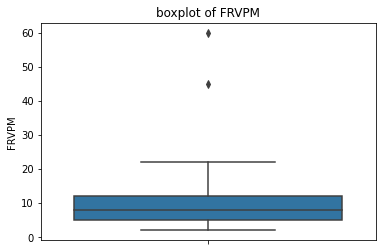

In [68]:
sns.boxplot(y=consumer_survey["FRVPM"])
plt.title('boxplot of FRVPM')
plt.show()

In [69]:
# largest 3 values from frvpm column
print(consumer_survey['FRVPM'].nlargest(3).values)

[60 45 22]


In [70]:
# finding Inter Quartile range to compute UWL and LWL
# IQR is difference between 75%  and 25% summary
IQR = five_number_summary['75%'] - five_number_summary['25%']
upper_limit=(1.5 * IQR)+five_number_summary['75%']
lower_limit=five_number_summary['25%'] -(1.5* IQR)

print("IQR", IQR)
print("1.5* IQR:", 1.5 * IQR)
print('upper_limit: ',upper_limit)
print('lower_limit: ',lower_limit)


IQR 7.0
1.5* IQR: 10.5
upper_limit:  22.5
lower_limit:  -5.5


### Histogram

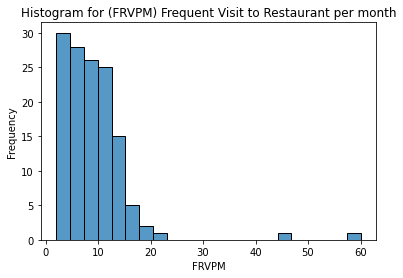

In [71]:
sns.histplot(consumer_survey['FRVPM'], kde=False)
plt.title("Histogram for (FRVPM) Frequent Visit to Restaurant per month")
plt.xlabel('FRVPM')
plt.ylabel('Frequency')
plt.show()

### Bar Chart

In [72]:
consumer_survey['income']=pd.Categorical(consumer_survey['income'], categories=['low','medium','high'], ordered=True)

In [73]:
cs_data=consumer_survey['income'].value_counts()
display(cs_data)

medium    82
low       36
high      16
Name: income, dtype: int64

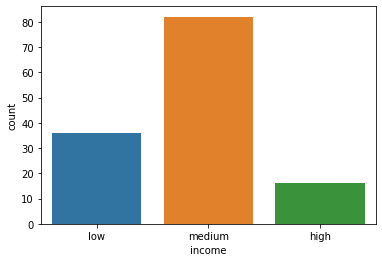

In [74]:
sns.countplot(x='income', data= consumer_survey)
plt_title=('Barchart of income')
plt.show()

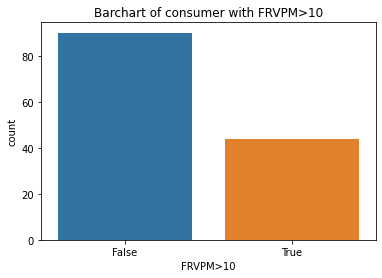

In [75]:
subset =pd.DataFrame(consumer_survey.FRVPM>10)
subset.columns=['FRVPM>10']
sns.countplot(x ='FRVPM>10', data=subset)
plt.title('Barchart of consumer with FRVPM>10')
plt.show()

([<matplotlib.patches.Wedge at 0x22b48dff430>,
 [Text(-0.378913619011373, 1.032678299049469, 'medium'),
  Text(-0.025786603527060265, -1.0996977089539373, 'low'),
  Text(1.0235119237908408, -0.4030177934756383, 'high')],
 [Text(-0.20668015582438523, 0.5632790722088011, '61%'),
  Text(-0.014065420105669234, -0.5998351139748748, '27%'),
  Text(0.5582792311586404, -0.21982788735034814, '12%')])

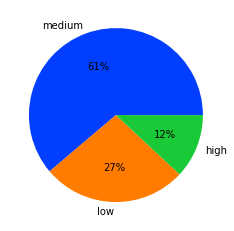

In [76]:
palette_color=sns.color_palette('bright')
cs_data=consumer_survey['income'].value_counts()
plt.pie(cs_data, labels=['medium','low','high'], colors=palette_color, autopct='%.0f%%')

### Exploring Qualitative Atrributes
#### Cross tabulation: This method is used to compute a simple cross-tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
#### In simple words Takes a qualitative attribute as input.Gives the frequency of the input data across various levels/categories as output


In [77]:
pd.crosstab(index=consumer_survey['gender'],columns='count', colnames=" ")

,count
gender,
female,61
male,73


As we can observe the crosstab function here takes gender data as index and returns the frequency count of each gender from consumer survey data

In [78]:
pd.crosstab(index=consumer_survey['income'], columns='count', colnames=" ")

,count
income,
low,36
medium,82
high,16


In [79]:
pd.crosstab(index=consumer_survey.FRVPM>10, columns='count', colnames=" ")

,count
FRVPM,
False,90
True,44


In [80]:
pd.crosstab(index=restaurant_details['Region'], columns='count', colnames=" ")

,count
Region,
East,55
West,48


## Developing Insights from data
### Exploring relationship between qualitative and quantitative attributes

#### Plot and compare multiple box plots

In [81]:
restaurant_details['Average_dine_in_per_month']=mean_updated['Average_dine_in_per_month']

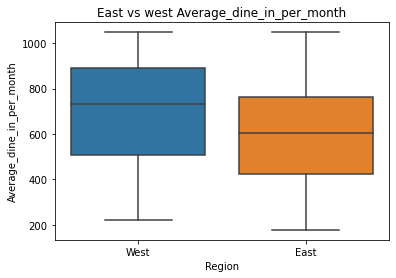

In [82]:
sns.boxplot(y='Average_dine_in_per_month', x='Region', data=restaurant_details)
plt.title("East vs west Average_dine_in_per_month")
plt.show() #no outlier on east or west, ADPM is more in west

In [83]:
### Plot and compare multiple histograms
subset_East=restaurant_details.loc[(restaurant_details.Region=='East'),['Region','Average_dine_in_per_month']]
subset_West=restaurant_details.loc[(restaurant_details.Region=='West'),['Region','Average_dine_in_per_month']]

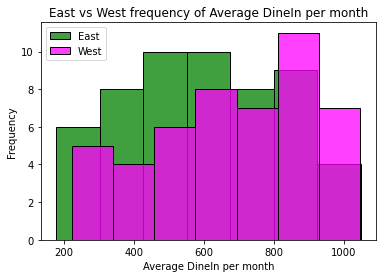

In [84]:
sns.histplot(subset_East['Average_dine_in_per_month'], color='green', kde=False, label='East')
sns.histplot(subset_West['Average_dine_in_per_month'], color='magenta', kde=False, label='West')
plt.legend()
plt.xlabel('Average DineIn per month')
plt.ylabel('Frequency')
plt.title('East vs West frequency of Average DineIn per month')
plt.show()

The above graph shows variation of frequency between east and west regions. From above graph we can observe west region have better dining service sales than east region.

In [85]:
#Finding how pricing varies based on region they belong to

### Exploring relationship among qualitative attributes

#### Pivot Table

In [86]:
#use pivot table to explore relation between price and region of restaurant
# pivot table fn index= region values=placeId attribute
rd_pivot=restaurant_details.pivot_table(index='Region', values='placeID', columns='price', aggfunc='count')
display(rd_pivot)


price,high,low,medium
Region,,,
East,16,15,24
West,7,13,28


As we can see there are more high priced resturant in east region than west. 
There are slightly more low price restuarnt in the east region. 
Medium priced restaurants are more in west region

In [87]:
#finding how many consumers from various income group visit restaurant more than five times a month
display(consumer_survey.head())
consumer_survey.reset_index(inplace=True)
display(consumer_survey.head())  #index column added in table

,gender,smoker,drink_level,dress_preference,ambience,transport,marital_status,interest,personality,religion,activity,income,FRVPM,AERPM
0,male,False,abstemious,informal,family,on foot,single,variety,thrifty-protector,none,student,medium,12,2976
1,female,False,abstemious,informal,family,public,single,technology,hunter-ostentatious,Catholic,student,low,12,3648
2,female,False,social drinker,formal,family,public,single,none,hard-worker,Catholic,student,low,3,1461
3,male,False,abstemious,informal,family,public,single,variety,hard-worker,none,professional,medium,18,4014
4,female,False,abstemious,no preference,family,public,single,none,thrifty-protector,Catholic,student,medium,15,3045


,index,gender,smoker,drink_level,dress_preference,ambience,transport,marital_status,interest,personality,religion,activity,income,FRVPM,AERPM
0,0,male,False,abstemious,informal,family,on foot,single,variety,thrifty-protector,none,student,medium,12,2976
1,1,female,False,abstemious,informal,family,public,single,technology,hunter-ostentatious,Catholic,student,low,12,3648
2,2,female,False,social drinker,formal,family,public,single,none,hard-worker,Catholic,student,low,3,1461
3,3,male,False,abstemious,informal,family,public,single,variety,hard-worker,none,professional,medium,18,4014
4,4,female,False,abstemious,no preference,family,public,single,none,thrifty-protector,Catholic,student,medium,15,3045


In [88]:
#using index column with pivot table to get required insights
consumer_survey.pivot_table(values='index', index=['income'],columns=consumer_survey.FRVPM>5, aggfunc='count')

FRVPM,False,True
income,,
low,20,16
medium,18,64
high,0,16


From above it can be observed that all consumer belonging to high , 
medium income group visit resturant more than 5 times per month. 
Also we can see that in low income group there are more number of people who
do visit restaurant less than 5 times a month.

In [89]:
#How many of 64 of consumer from medium income group who visit restaurant FRVPM>5 are male.
consumer_survey.pivot_table(values='index', index=['gender','income'],columns=consumer_survey.FRVPM>5, aggfunc='count')

FRVPM          False  True
gender income             
female low         8     7
       medium      8    34
       high        0     4
male   low        12     9
       medium     10    30
       high        0    12

As we can see around 30 male from medium income group visit restuarant more than 5 times a month

### Exploring relationships among quanititative attributes

#### Scatter Plot

In [90]:
#finding if people prefer to order or dine at restuarnt
dining_preferences.head()

,Year,Dine_In,Home_Delivery
0,1990,5649,0
1,1991,5539,0
2,1992,5760,104
3,1993,6509,76
4,1994,6982,156


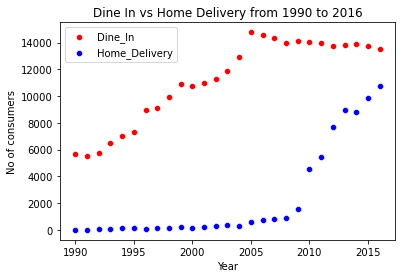

In [91]:
#plotting scatter plot between dine in and home_delivery attributes
sns.scatterplot(x='Year',y='Dine_In', data=dining_preferences, color='red', label='Dine_In')
sns.scatterplot(x='Year',y='Home_Delivery', data=dining_preferences, color='blue', label='Home_Delivery')
plt.legend()
plt.xlabel('Year')
plt.ylabel('No of consumers')
plt.title('Dine In vs Home Delivery from 1990 to 2016')
plt.show()

We can see from year 2005-2016 while dine in orders remained same , Home_delivery orders increased significantly

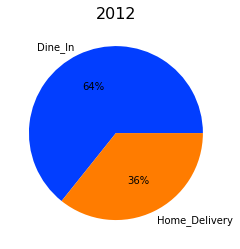

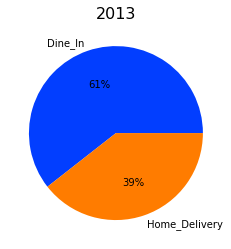

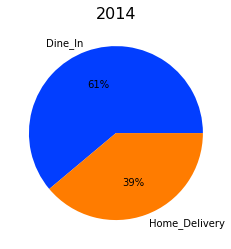

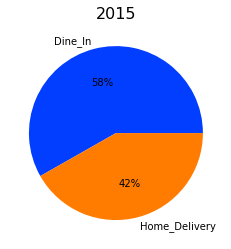

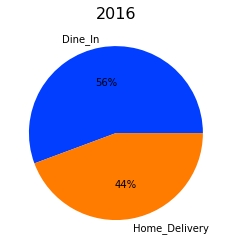

In [123]:
Year=[]

Year= list(dining_preferences.Year.tail())
a=len(Year)
Dine_Ins=list(dining_preferences.Dine_In.tail())
Home_Deliverys=list(dining_preferences.Home_Delivery.tail())
for i in range(a):
    a=Dine_Ins[i]
    b=Home_Deliverys[i]
    palette_color=sns.color_palette('bright')
    plt.figure(i)
    plt.title(Year[i],fontsize=16)
    plt.pie([a,b], labels=['Dine_In','Home_Delivery'], colors=palette_color, autopct='%.0f%%')
plt.show()

## Line Chart

<AxesSubplot:xlabel='Year'>

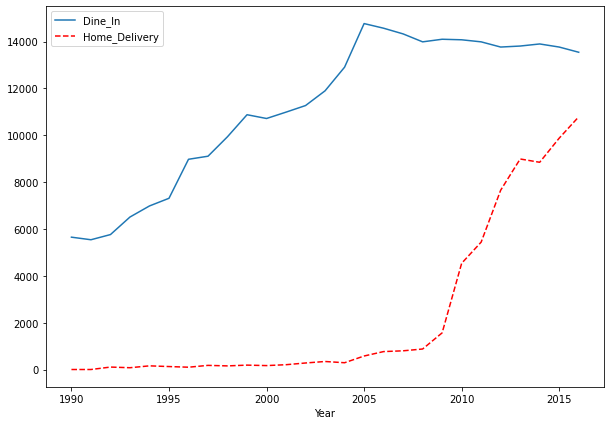

In [96]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
dining_preferences.plot(ax = ax, x = "Year", y = "Dine_In", kind = "line", )
dining_preferences.plot(ax = ax, x = "Year",y= "Home_Delivery", kind = "line", linestyle='--',color="red")
